<a href="https://colab.research.google.com/github/sanujsriv/_topic_models/blob/FoTo/FoTo_All_Local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Local Dir Browse
# import os
# os.chdir("C:/Users/sanuj/Documents/FoTo/")
# !dir

# Download from pickle from Dropbox (Sentences)

In [ ]:
!wget https://www.dropbox.com/s/lnk001gexy74b0l/data.zip

In [ ]:
!unzip data.zip

In [ ]:
!unzip train_vec_non_zeros.zip

Archive:  train_vec_non_zeros.zip
  inflating: train_vec_non_zeros.pkl  


In [ ]:
# !wget https://www.dropbox.com/s/a13qhl5rr73s7zm/sentences.zip

In [ ]:
# !unzip sentences.zip && mv -v /content/sentences/*.* .

In [ ]:
!wget https://www.dropbox.com/s/408eefyszxnadke/50_data_load_20news_sentences_labels.pkl
!wget https://www.dropbox.com/s/hqq00bqababxovo/50_data_load_20news_sentences_preprocessed.pkl
!wget https://www.dropbox.com/s/e63a0ew3y7ktz17/50_doc_id_sent_load_20news_sentences.pkl

# Download pickle from Dropbox (Documents)

In [ ]:
!wget https://www.dropbox.com/s/jyiyte9vmkwojee/50_embeddings_load_20news_docs.pkl
!wget https://www.dropbox.com/s/py3j67m5jnzmqlt/50_docs_preprocessed.pkl
!wget https://www.dropbox.com/s/j5vex21bdcfhaqy/50_docs_labels.pkl

--2020-10-07 04:18:38--  https://www.dropbox.com/s/jyiyte9vmkwojee/50_embeddings_load_20news_docs.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jyiyte9vmkwojee/50_embeddings_load_20news_docs.pkl [following]
--2020-10-07 04:18:39--  https://www.dropbox.com/s/raw/jyiyte9vmkwojee/50_embeddings_load_20news_docs.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc9e9398b01ab007dbc178e15c1.dl.dropboxusercontent.com/cd/0/inline/BAwEcQf3WIRXtCA3w8ETlnndib80fetg4uMCVsLZkeO1yZiGkNazn-IetGdmDzpCQBcnb0xGHCbYVPP2dtLa4QWYmScw-g8XUoWnKcu1h1TJpEUaLTJ1VrG3A9oJSdggr68/file# [following]
--2020-10-07 04:18:39--  https://ucc9e9398b01ab007dbc178e15c1.dl.dropboxusercontent.com/cd/0/inline/BAwEcQf3WIRXtCA3w8ETlnndib80fetg4uMCVsLZkeO1y

In [ ]:
# !wget https://www.dropbox.com/s/9v5ar9xu2dv4e04/data_twentynews_preprocessed.pkl
# !wget https://www.dropbox.com/s/09y9y1h0xk3cxaj/embeddings_twentynews.pkl
# !wget https://www.dropbox.com/s/ewv3vcwgll0r8a7/data_twentynews_labels.pkl
# !wget https://www.dropbox.com/s/chpjn9lzr7rmn2k/fixed_data_twentynews_preprocessed.pkl

In [ ]:
# !wget https://www.dropbox.com/s/8khmuj31il8zgkp/data_reuters_labels.pkl
# !wget https://www.dropbox.com/s/bgc1ht0jsyjed6s/embeddings_reuters.pkl
# !wget https://www.dropbox.com/s/9fk30bjzeefvhgl/data_reuters_preprocessed.pkl

In [ ]:
# !wget https://www.dropbox.com/s/52eoulcm5807npk/data_arxiv_preprocessed.pkl
# !wget https://www.dropbox.com/s/zgjy9575pcj5v67/embeddings_arxiv.pkl
# !wget https://www.dropbox.com/s/xzvshpgvwiy3spz/data_arxiv_labels.pkl

In [ ]:
# !wget https://www.dropbox.com/s/c6wlr148lhwsbaz/embeddings_wos.pkl
# !wget https://www.dropbox.com/s/j96061ln6oeejkf/data_wos_preprocessed.pkl
# !wget https://www.dropbox.com/s/kiffa4nidkjt7wi/data_wos_labels.pkl

In [ ]:
# !wget https://www.dropbox.com/s/wz88fk42r0viqvo/data_webkb_preprocessed.pkl
# !wget https://www.dropbox.com/s/8oi5qactwrar1ad/data_webkb_labels.pkl
# !wget https://www.dropbox.com/s/go7r4h39q6l01d5/embeddings_webkb.pkl

# Just Run these..

In [ ]:
# #@title Download Stopwords , punkt, wordnet
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [ ]:
#@title Imports
# from sympy.stats import RaisedCosine, density
import torch
import pandas as pd
from torch import nn
import re
import gc
from time import time
import numpy as np
import collections
import torch.optim as optim
# from utils import get_topwords, plot_fig
# from plsv_vae import PlsvVAE
# import data_preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import sklearn
import re
import string
from numpy import random
# from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import fetch_rcv1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Model, Training, Testing, Visualization

In [ ]:
# @title New Data Loading function..
def load_20News_sentences():
  doc_preprocessed = load_obj('doc_preprocessed_nonzeroes')
  doc_preprocessed_labels = load_obj("doc_preprocessed_nonzeroes_labels")
  embeddings = load_obj('embeddings_20news')
  doc_id_sent = load_obj('doc_id_sent_nonzeros')
  sen_preprocessed = load_obj('sen_preprocessed_nonzeroes')
  train_vec = load_obj('train_vec_non_zeros')
  vocab = load_obj('vocab')
  all_rscores = load_obj('all_rscores')
  return doc_preprocessed,doc_preprocessed_labels,embeddings,doc_id_sent,sen_preprocessed,train_vec,vocab,all_rscores,load_20News_sentences.__name__

In [ ]:
# @title Data Loading functions..

def load_20News_50():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_docs_preprocessed')
  data_preprocessed_labels = load_obj("50_docs_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_50.__name__

def load_20News_50_sentences():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_data_load_20news_sentences_preprocessed')
  data_preprocessed_labels = load_obj("50_data_load_20news_sentences_labels")
  doc_sent_id = load_obj('50_doc_id_sent_load_20news_sentences')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_50_sentences.__name__


def load_reuters():
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  embeddings = load_obj('embeddings_reuters')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_reuters.__name__

def load_20News():
  embeddings = load_obj('embeddings_twentynews')
  # data_preprocessed = load_obj('data_twentynews_preprocessed')
  data_preprocessed = load_obj('fixed_data_twentynews_preprocessed')
  data_preprocessed_labels = load_obj("data_twentynews_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News.__name__

def load_20News_sentences():
  embeddings = load_obj('embeddings_twentynews_sent')
  data_preprocessed = load_obj('data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("data_twentynews_labels_sent")
  doc_sent_id = load_obj('doc_id_sent_twentynews')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_sentences.__name__

def load_20News_reuters():
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  embeddings = load_obj('embeddings_reuters')
  data_preprocessed.extend(load_obj('data_20News_preprocessed'))
  data_preprocessed_labels.extend(load_obj("data_20news_preprocessed_labels"))
  embeddings.update(load_obj('embeddings_20news'))
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_reuters.__name__

def load_r52():
  data_preprocessed = load_obj('data_r52_preprocessed')
  data_preprocessed_labels = load_obj("data_r52_labels")
  embeddings = load_obj('embeddings_r52')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_r52.__name__

def load_WebKb():
  data_preprocessed = load_obj('data_webkb_preprocessed')
  data_preprocessed_labels = load_obj("data_webkb_labels")
  embeddings = load_obj('embeddings_webkb')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WebKb.__name__

def load_WoS():
  data_preprocessed = load_obj('data_wos_preprocessed')
  data_preprocessed_labels = load_obj("data_wos_labels")
  embeddings = load_obj('embeddings_wos')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WoS.__name__
def load_arXiv():
  data_preprocessed = load_obj('data_arxiv_preprocessed')
  data_preprocessed_labels = load_obj("data_arxiv_labels")
  embeddings = load_obj('embeddings_arxiv')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_arXiv.__name__

In [ ]:
# #!unzip train_vec_non_zeros.zip

# # ##### Data loading #####
# loaded_data = load_20News_sentences

# ##########################

# doc_preprocessed,doc_preprocessed_labels,embeddings,doc_id_sent,sen_preprocessed,train_vec,vocab,all_rscores, name = loaded_data()
# print(name,len(doc_preprocessed_labels),len(doc_preprocessed),len(embeddings),len(doc_id_sent),len(sen_preprocessed))
# print(len(doc_preprocessed),max(doc_id_sent))

In [ ]:
# ## Data loading ##
loaded_data = load_20News_50_sentences

##########################
# data_preprocessed , data_preprocessed_labels , embeddings, name = loaded_data()

data_preprocessed , data_preprocessed_labels , embeddings, doc_sent_id, name = loaded_data()
data_preprocessed_docs , data_preprocessed_labels_docs , embeddings_docs,doc_fn_name = load_20News_50()
print(name,len(data_preprocessed_labels),len(data_preprocessed),len(embeddings),len(doc_sent_id))

load_20News_50_sentences 121453 121453 35256 121453


In [ ]:
# len(data_preprocessed_docs),max(doc_sent_id)

(17895, 17894)

In [ ]:
def most_frequent(List):
    return max(set(List), key = List.count)
most_freq = most_frequent(doc_id_sent)
max_sent = doc_id_sent.count(most_freq)
most_freq , max_sent

In [ ]:
k=1221
print(data_preprocessed_docs[k])
print(data_preprocessed_labels_docs[k])

doe schematic micro stepping circuit help appreciated
sci.electronics


In [ ]:
# def cosine_similarity_desm_docs(query_list, doc, embeddings):

#   sim_list = torch.zeros(len(doc))
#   index = 0

#   for d in doc:
#     doc_bar = torch.zeros(300)
#     words = d.split()
#     for word in words:
#       doc_bar.add_(torch.from_numpy(embeddings[word])/torch.norm(torch.from_numpy(embeddings[word])))
#     doc_bar = doc_bar / len(words)
#     sum = 0

#     for q in query_list:
#       sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
#     sum = sum/len(query_list)
#     sim_list[index]=sum
#     index = index + 1

#   return sim_list

In [ ]:
def cosine_similarity_desm_docs_new(query_list, train_vec, vocab, embeddings):
  num_docs = len(train_vec)
  num_voc = len(vocab)
  sim_list = torch.zeros(num_docs)
  index = 0
  id_vocab = dict(map(reversed, vocab.items()))
  for d in range(num_docs):
    if(d%5000==0): print(d)
    doc_bar = torch.zeros(300)
    doc_length = 0
    for v in range(num_voc):
      if(train_vec[d][v]>0):
        doc_bar.add_(train_vec[d][v] * torch.from_numpy(embeddings[id_vocab[v]])/torch.norm(torch.from_numpy(embeddings[id_vocab[v]])))
        doc_length = doc_length + train_vec[d][v]
    doc_bar = doc_bar / doc_length
    sum = 0

    for q in query_list:
      sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
    sum = sum/len(query_list)
    sim_list[index]=sum
    index = index + 1

  return sim_list

In [ ]:
def get_keywords():
  keywords = []
  keywords_arxiv = ['molecular ','stimulation','liquid','fluid']

  keywords_webkb = ['class','student','department','year']
  # keywords_r52 = ['mutual','fund','market','money']

  keywords_WoS = ['pediatric','protein','clone']
  # keywords_20News_Reuters = ['oil','price','opec','bpd','barrel','saudi','production','mln','crude']

  keywords_reuters = ['company', 'analyst', 'offer', 'pct', 'takeover', 'merger', 'record', 'dividend', 'pay', 'stock']
  # keywords_reuters = ['stock', 'dividend', 'inc']

  # keywords_20News = ['baseball','game','sport','win']
  # keywords_20News = ['looking' ,'add', 'voice' ,'input', 'capability', 'user', 'interface']
  keywords_20News = ['sport', 'baseball', 'game','match']
  # keywords_20News = ['young']

  keywords = keywords_20News

  return keywords

# Process Data

In [ ]:
def preprocessed_data(preprossed_data,train_label):
  vectorizer = CountVectorizer(max_features=5000,dtype=np.float32)
  train_vec = vectorizer.fit_transform(preprossed_data).toarray()
  vocab = vectorizer.vocabulary_
  nonzeros_indexes = np.where(train_vec.any(1))[0]
  train_vec_non_zeros = [train_vec[i] for i in nonzeros_indexes]
  preprossed_data_non_zeros = [preprossed_data[i] for i in nonzeros_indexes]
  train_label = [train_label[i] for i in nonzeros_indexes]
  keywords = get_keywords()
  # all_rscores = cosine_similarity_desm_docs(keywords, preprossed_data_non_zeros, embeddings)
  all_rscores = cosine_similarity_desm_docs_new(keywords, train_vec_non_zeros, vocab, word2vec_model)
  return all_rscores,preprossed_data_non_zeros,train_label,train_vec_non_zeros,vocab

In [ ]:
# Documents
all_rscores, preprossed_data_non_zeros, train_label, train_vec_non_zeros,vocab = preprocessed_data(data_preprocessed_docs,data_preprocessed_labels_docs)

# Sentences
# all_rscores, preprossed_data_non_zeros, train_label, train_vec_non_zeros,vocab = preprocessed_data(data_preprocessed,data_preprocessed_labels)
gc.collect()

0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  del sys.path[0]


5000
10000
15000


0

In [ ]:
test = [j for j, x in enumerate(doc_sent_id_non_zeroes) if x == 1865]
print(test)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_vec = np.array(train_vec_non_zeros)
tensor_train_w = torch.from_numpy(train_vec)
train_label = np.asarray(train_label)
id_vocab = dict(map(reversed, vocab.items()))

num_coordinate = 2

# bs = 1024
bs = 256
# bs = 10
# bs = 5

en1_units_x = 100
en2_units_x = 100
num_input = train_vec[0].shape[0]
variance_x = 1
learning_rate = 0.002
beta1 = 0.99
beta2 = 0.999
drop_rate = 0.6
num_topic = 20
gc.collect()

0

In [ ]:
#@title All variables occupying memory
import sys
local_vars = list(locals().items())
for var, obj in local_vars:
    print(var, sys.getsizeof(obj))

In [ ]:
#@title Variables occupying large amt of mem
import sys
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
    print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

In [ ]:
# torch.max(all_rscores)
keywords = get_keywords()
top_10_docs=[]
sort,indices = torch.sort(all_rscores,descending=True)
print('Keywords',get_keywords())
print('Descending :',sort,'\n','indices:',indices)
print('\n\n Top 10 Relevant Documents (DESM):\n\n',"---"*40)

for k in range(10):
    print(k+1,') ',preprossed_data_non_zeros[indices[k].item()])
    print(k+1,')',train_label[indices[k].item()])
with open("1000.txt", "w") as output:
  for k in range(0,1000):
    output.write(str(k+1)+')  '+preprossed_data_non_zeros[indices[k].item()]+'\n')
    output.write(str(k+1)+')  '+str(sort[indices[k].item()].item())+'\n')
    output.write(str(k+1)+')  '+train_label[indices[k].item()]+'\n\n')

    # print(k+1,') ',preprossed_data_non_zeros[indices[k].item()])
    # print(k+1,')',train_label[indices[k].item()])
    # print()

output.close()

Keywords ['sport', 'baseball', 'game', 'match']
Descending : tensor([ 0.5816,  0.5603,  0.5548,  ..., -0.0183, -0.0353, -0.0614]) 
 indices: tensor([15484, 13984, 10007,  ...,   832,  1883,  2038])


 Top 10 Relevant Documents (DESM):

 ------------------------------------------------------------------------------------------------------------------------
1 )  major league baseball expand appeal people shorter attention span football crowd invariably argument people watch baseball thing game long boring baseball find shorten game wider appeal baseball game amount time football game difference action duration football game action baseball game fan tune coming solution baseball appealing bigger crowd going difficult soapbox reason commisioner obvious ruling baseball comittee work fast snail race nebraska soapbox steve
1 ) rec.sport.baseball
2 )  illusion football lot action sense urgency game clock time le minute sense creates drama hold viewer attention baseball player involved action w

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores=torch.tensor(normalized_all_rscores.flatten())
rounded_normalized_all_rscores = torch.round(normalized_all_rscores*10)/10.0

(array([8.000e+00, 1.720e+02, 1.044e+03, 4.717e+03, 8.699e+03, 2.159e+03,
        5.380e+02, 3.910e+02, 9.500e+01, 1.800e+01]),
 array([-0.06140158,  0.00289865,  0.06719887,  0.1314991 ,  0.19579932,
         0.26009953,  0.32439977,  0.38869998,  0.45300022,  0.5173004 ,
         0.58160067], dtype=float32),
 <a list of 10 Patch objects>)

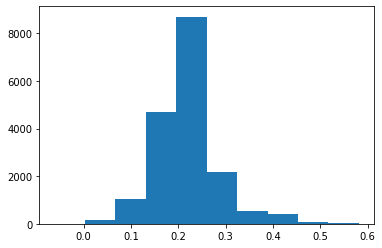

In [ ]:
plt.hist(all_rscores)

(array([2.000e+00, 5.400e+01, 2.996e+03, 0.000e+00, 8.053e+03, 6.026e+03,
        4.730e+02, 0.000e+00, 2.000e+02, 3.700e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

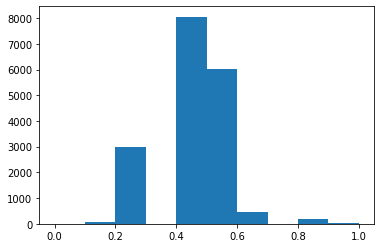

In [ ]:
plt.hist(rounded_normalized_all_rscores)

In [ ]:
# set(train_label)
r_origin = rounded_normalized_all_rscores

In [ ]:
for i in range(len(rounded_normalized_all_rscores)):
#   if (train_label[i] == 'sci.crypt' or train_label[i] == 'rec.sport.hockey' or train_label[i] == 'sci.med'):
    for k in keywords:
      if (k in preprossed_data_non_zeros[i]):
        rounded_normalized_all_rscores[i] = 1.0

In [ ]:
s,i = rounded_normalized_all_rscores.sort()
c=0
for a in s:
  if a == 1.00:
    c = c+1
c

1406

(array([2.000e+00, 5.400e+01, 2.975e+03, 0.000e+00, 7.933e+03, 5.346e+03,
        1.170e+02, 0.000e+00, 8.000e+00, 1.406e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

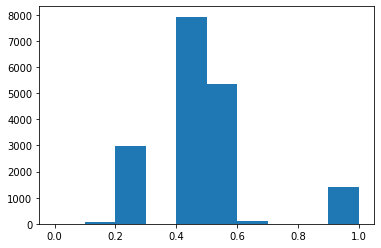

In [ ]:
plt.hist(rounded_normalized_all_rscores)

In [ ]:
gc.collect()

0

Other Distributions
(Beta, Gaussian, Raised Cosine) etc..

In [ ]:
# @title
# def beta(x,mu,a):
#   smoothen=1e-20
#   b = (a - a * (mu+smoothen))/(mu+smoothen)
#   # a = (b * (mu+smoothen))/((1-mu)+smoothen)
#   deno = (torch.lgamma(a)+torch.lgamma(b)-torch.lgamma(a+b))
#   ret = (a-1)*torch.log(x) + (b-1)*torch.log(1-x)-deno
#   return ret

# def log_gaussian(x,mu,variance):
#   pi = 3.1415927410125732
#   ret = -0.5 * ((x-mu)/variance)**2 - torch.log(variance*(2*pi)**0.5)
#   return ret

# def raised_cosine(x,mu,s):
#   #torch.pi = torch.acos(torch.zeros(1)).item() * 2
#   pi = 3.1415927410125732

#   check_range = (x > mu-s) & (x < mu+s)
#   a = 1.0 / 2*s
#   c = (x - mu) / s
#   b = torch.cos(pi * c)
#   raised_cosine = a*(1+b)

#   raised_cosine = raised_cosine * check_range

#   return raised_cosine

# def LogL_Score_beta(theta,phi,torch_sim):
#   # s_rc=1
#   # phi_z = torch.norm(phi,dim=-1).unsqueeze(-1) #num_topic --> 50
#   # R_phi = torch.exp(-0.5 * (torch.pow(phi_z,2))) # ---> 50 x 1
#   # mu = torch.matmul(theta,R_phi) # bs x num_topic * num_topicx1
#   # LogL = torch.log(raised_cosine(torch_sim, mu, s_rc)+1e-20)
#   #b=torch.tensor(100.0)
#   # a=torch.tensor(100.0)

#   phi_z = torch.norm(phi,dim=-1).unsqueeze(-1) #num_topic --> 50
#   R_phi = torch.exp(-0.5 * (torch.pow(phi_z,2))/100.0 ) # ---> 50 x 1
#   mu = torch.matmul(theta,R_phi) # bs x num_topic * num_topicx1
#   LogL = beta(torch_sim, mu, a)
#   return LogL.sum()

# def LogL_Score(x,torch_sim):
#   x=x.squeeze(-2)
#   variance=torch.tensor(0.1)
#   x_norm = torch.norm(x,dim=-1)
#   mu = torch.exp(-0.5 * (torch.pow(x_norm,2)))
#   LogL = log_gaussian(torch_sim, mu, variance)
#   #LogL = beta(torch_sim, mu, b)
#   return LogL.sum()

# # def LogL_Score_test(zx,relevant_scores):
# #   x_norm = torch.norm(zx,dim=-1)
# #   NegativeLogL_RScore = 10000 * torch.exp(-0.5 * (torch.pow(x_norm,2)/100.0) - relevant_scores)**2
# #   return NegativeLogL_RScore.sum()


# def LogL_Score_current(theta,phi,relevant_scores):
#   a=torch.tensor(100.0)
#   phi_z = torch.norm(phi,dim=-1).unsqueeze(-1)
#   R_phi = torch.exp(-0.5 * (torch.pow(phi_z,2)))

#   R_n = torch.pow(theta,R_phi)

#   LogL = beta(torch_sim, mu, a)
#   return LogL.sum()

In [ ]:
#@title Reverse Sigmoid Function
import matplotlib.pylab as plt
import numpy as np
var = -0.5 # change this to -1.0, -1.5 , -2.0
x = np.arange(-8, 8, 0.1)
y = np.exp(var*x) / (1 + np.exp(var*x))

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#@title Truncated Normal , Beta ..
# def inv_S(r,a,c,D,smoothen):
#   numr = 1-c
#   deno = 1+ torch.exp(a * ( (2*r)/D - 1))
#   invS = numr / (deno + smoothen) + c
#   return invS

# def beta(x,mu,a):
#   smoothen=1e-20
#   b = (a - a * (mu+smoothen))/(mu+smoothen)
#   # a = (b * (mu+smoothen))/((1-mu)+smoothen)
#   deno = (torch.lgamma(a)+torch.lgamma(b)-torch.lgamma(a+b))
#   ret = (a-1)*torch.log(x) + (b-1)*torch.log(1-x)-deno
#   return ret

# def truncate_phi(Xi):
#   pi = 3.1415927410125732
#   return (1.0/ ((2.0*pi)**0.5) )*torch.exp(-0.5*(Xi**2))

# def truncate_bold_phi(x):
#   return 0.5 * (1.0 + torch.erf(x / (2.0**0.5)))

# def truncate_norm_dist(x,mu,a,b,sig,smoothen):
#     check_range = (x >= mu-a) & (x <= mu+b)
#     # check_range = (x >= a) & (x<=b)
#     l=(1.0/sig)
#     r_numr= truncate_phi((x-mu)/sig)
#     r_deno= truncate_bold_phi((b-mu)/sig) - truncate_bold_phi((a-mu)/sig)
#     tr_ndist = l*(r_numr/(r_deno+smoothen))
#     #print(tr_ndist)
#     tr_ndist = tr_ndist*check_range
#     #print(tr_ndist)
#     return tr_ndist


# def LogL_Score_TND(theta,phi,relevant_scores, query_center,x):
#   smoothen=1e-20
#   a=1
#   b=1
#   sig=0.01

#    #phi_z = torch.norm(phi,dim=-1).unsqueeze(-1)

#   # phi_z = (phi-query_center.T).pow(2).sum(-1).unsqueeze(-1)
#   # R_phi = torch.exp(-0.5 * (torch.pow(phi_z,2))/mu_div)
#   # mu = torch.prod(R_phi ** theta.T,0)

#   x_norm = (x-query_center.T).pow(2).sum(-1)
#   mu = torch.exp(-0.5 * (x_norm)/mu_div)

#   # x_norm = torch.norm(x,dim=-1)
#   # mu = torch.exp(-0.5 * (torch.pow(x_norm,2))/mu_div)

#   # mu = 1.0/(1.0 + (torch.pow(x_norm,2)/mu_div))
#   LogL = torch.log(truncate_norm_dist(relevant_scores, mu, a,b,sig,smoothen)+smoothen)


  # a = torch.tensor(3.0)
  # c = torch.tensor(0.0035)
  # D = torch.tensor(23.0)

  # # LogL = torch.log(inv_S(x_norm,a,c,D,smoothen)+smoothen)
  # return LogL.sum()

# Current Working Model


In [ ]:
import sklearn
import pickle
import torch
import sys
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sympy.stats import RaisedCosine,density
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torch.utils.data as data_utils
from torch.utils.data import Dataset, DataLoader, TensorDataset
from types import SimpleNamespace
from torch.nn import Parameter
torch.cuda.empty_cache()

mu_div = 300.0
gaussian_variance=torch.tensor(0.05)

def log_gaussian(x,mu,variance):
   pi = 3.1415927410125732
   ret = -0.5 * ((x-mu)/variance)**2 - torch.log(variance*(2*pi)**0.5)
   return ret

def LogL_gaussianScore(x,relevant_scores,query_center):

  x_norm = torch.norm(x,dim=-1)
  mu = torch.exp(-0.5 * (torch.pow(x_norm,2))/mu_div )

  # x_norm = (x-query_center.T).pow(2).sum(-1)
  # mu = torch.exp(-0.5 * (x_norm)/mu_div)

  LogL = log_gaussian(relevant_scores, mu, gaussian_variance)
  return LogL.sum()
############################################################################################


def gaussian(alpha):
    # phi = torch.exp(-5*alpha)
    phi = -0.5*alpha
    return phi

def inverse_multi_quadric(alpha):
    phi = -0.5*torch.log(torch.ones_like(alpha) + alpha)
    return phi

def inverse_quadratic(alpha):
    # phi = torch.ones_like(alpha) / (torch.ones_like(alpha) + alpha)
    phi = -torch.log(torch.ones_like(alpha) + alpha)
    return phi

class PlsvVAE(nn.Module):
    def __init__(self, num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, distance="gaussian"):
        super(PlsvVAE, self).__init__()
        self.num_input, self.num_coordinate, self.num_topic, self.variance_x, self.bs\
            = num_input, num_coordinate, num_topic, variance_x, bs

        # encoder
        self.en1_fc     = nn.Linear(num_input, en1_units_x)             # V -> 100 #nxV->(vxh1)->nxh1;
        self.en2_fc     = nn.Linear(en1_units_x, en2_units_x)             # 100  -> 100
        self.en2_drop   = nn.Dropout(drop_rate)
        self.mean_fc    = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.mean_bn    = nn.BatchNorm1d(num_coordinate)              # bn for mean
        self.logvar_fc  = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.logvar_bn  = nn.BatchNorm1d(num_coordinate)              # bn for logvar


        # RBF
        self.in_features = self.num_coordinate
        self.out_features = self.num_topic
        self.centres = nn.Parameter(torch.Tensor(self.out_features, self.in_features))


        self.query_center = nn.Parameter(torch.zeros(2,1))

        if distance=="gaussian":
            self.basis_func = gaussian
        if distance=="inverse_quadratic":
            self.basis_func = inverse_quadratic
        if distance=="inverse_multi_quadric":
            self.basis_func = inverse_multi_quadric
        self.init_parameters()


        # decoder layer
        self.decoder    = nn.Linear(self.num_topic, self.num_input)             # 50   -> 1995
        self.decoder_bn = nn.BatchNorm1d(self.num_topic)                      # bn for decoder

        # decoder document
        self.decoder_phi_bn = nn.BatchNorm1d(num_coordinate)                      # bn for decoder
        self.decoder_x_bn = nn.BatchNorm1d(num_coordinate)

        # prior mean and variance as constant buffers
        prior_mean   = torch.Tensor(1, num_coordinate).fill_(0)
        prior_var    = torch.Tensor(1, num_coordinate).fill_(variance_x)
        self.prior_mean = nn.Parameter(prior_mean, requires_grad=False)
        self.prior_var  = nn.Parameter(prior_var, requires_grad=False)
        self.prior_logvar = nn.Parameter(prior_var.log(), requires_grad=False)


    def init_parameters(self):
        nn.init.normal_(self.centres, 0, 0.01)

    def encode(self, input_):
        N, *_ = input_.size()
        # compute posterior
        en1 = F.softplus(self.en1_fc(input_))                           # en1_fc   output
        en2 = F.softplus(self.en2_fc(en1))                              # encoder2 output
        en2 = self.en2_drop(en2)
        posterior_mean   = self.mean_bn  (self.mean_fc  (en2))          # posterior mean
        posterior_logvar = self.logvar_bn(self.logvar_fc(en2))          # posterior log variance
        posterior_var    = posterior_logvar.exp()

        return en2, posterior_mean, posterior_logvar, posterior_var

    def take_sample(self, input_, posterior_mean, posterior_var, prior_var):
        # take sample
        eps = input_.data.new().resize_as_(posterior_mean.data).normal_(std=1) # noise
        # N x X
        z = posterior_mean + posterior_var.sqrt() * eps                   # reparameterization

        return z

    def decode(self, z):
        # decode
        N, *_ = z.size()
        zx = self.decoder_x_bn(z).view(N, 1, self.num_coordinate) # Nx1xX

        # se = self.decoder_x_bn(z).view(N, S, self.num_coordinate) # NxSxV

        # zx = z.view(N, 1, self.num_coordinate) # Nx1xX

        size = (N, self.out_features, self.in_features) # N,K,2
        x = zx.expand(size)
        c = self.decoder_phi_bn(self.centres).unsqueeze(0).expand(size)
        # c = self.centres.unsqueeze(0).expand(size)

        d = (x-c).pow(2).sum(-1)
        distances = self.basis_func(d) #NxK
        zx_phi = torch.exp(distances - torch.logsumexp(distances, dim=-1, keepdim=True))
        recon_v = torch.mm(zx_phi, F.softmax(self.decoder_bn(self.decoder.weight).transpose(1,0), dim=-1))
        return recon_v, zx, zx_phi, d, c

    def forward(self, input_, relevant_scores, compute_loss=False):
        en2, posterior_mean, posterior_logvar, posterior_var = self.encode(input_)
        z = self.take_sample(input_, posterior_mean, posterior_var, self.variance_x)

        # decode
        recon_v, zx, zx_phi,d,c= self.decode(z)

        if compute_loss:
            return recon_v, self.loss(input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores, zx)
        else:
            return z, recon_v, zx, zx_phi


    def loss(self, input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores, zx, avg=True):
        N = posterior_mean.shape[0]
        L = recon_v.shape[0]
        NL = - (input_ * (recon_v+1e-10).log()).sum(-1)

#         N1, *_ = z.size()
#         size = (N1, self.out_features, self.in_features)
#         c = self.decoder_phi_bn(self.centres).unsqueeze(0).expand(size)

        prior_mean   = self.prior_mean.expand_as(posterior_mean)
        prior_var    = self.prior_var.expand_as(posterior_mean)
        prior_logvar = self.prior_logvar.expand_as(posterior_mean)

        var_division    = posterior_var  / prior_var #Nx2
        diff            = posterior_mean - prior_mean
        diff_term       = diff * diff / prior_var
        logvar_division = prior_logvar - posterior_logvar

        xKLD = 0.5 * ( (var_division + diff_term + logvar_division).sum(-1) - self.num_coordinate)
        return_xKLD = xKLD.mean(0)
        KL = return_xKLD

        # NegativeLogL_RScore = - LogL_Score_beta(zx_phi,self.decoder_phi_bn(self.centres),relevant_scores)
        # NegativeLogL_RScore = - LogL_Score(zx,relevant_scores)
        # x_norm = torch.norm(zx,dim=-1)
        # NegativeLogL_RScore = (100000 * (torch.exp(-0.5 * (torch.pow(x_norm,2)/10.0) - relevant_scores )  )**2  ).sum()
        # NegativeLogL_RScore = LogL_Score_test(zx,relevant_scores)

        #NegativeLogL_RScore = - LogL_Score_TND(zx_phi,self.decoder_phi_bn(self.centres),relevant_scores, self.query_center,zx)

        NegativeLogL_RScore = - LogL_gaussianScore(zx,relevant_scores,self.query_center)
        loss = NL.sum() + KL + NegativeLogL_RScore

        # print(type(loss))
        return loss/N, NL.sum(), return_xKLD,  KL, NegativeLogL_RScore

p(r|z): NxSxT
p(z|x): NxT --> squeeze --> NxSxT

p(w|z): TxV --> squeeze --> NxSxTxV
input_w: NxSxV --> squeeze --> NxSxTxV

log(sum(NxSxT (R) * NxSxT (Z) * product((NxSxTxV)^input_w, dim=-1) NxSxT, dim = -1)).sum()

In [ ]:
model = PlsvVAE(num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, "inverse_quadratic")
model.to(device)
optimizer = optim.Adam(model.parameters(), learning_rate, betas=(beta1, beta2))
epochs = 1000
phi_arr = []
beta_arr = []
x_arr = []
recon_arr = []
neg_log_rscore_arr=[]
list_d = []
# bs = 128
all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)

for epoch in range(epochs):
    loss_u_epoch = 0.0
    loss_xkl_epoch = 0.0
    loss_betakl_epoch = 0.0
    loss_phikl_epoch = 0.0
    loss_KLD = 0.0
    loss_phi_epoch = 0.0
    recon_ep = 0.0
    loss_epoch = 0.0
    neg_log_rscore_ep = 0.0
    model.train()
    d_temp = []
    count = 0

    for batch_ndx in all_indices:
        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        #relevant_scores = all_rscores[batch_ndx].to(device).unsqueeze(-1)
        #relevant_scores = normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)
        relevant_scores = rounded_normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)
        recon_v, (loss, loss_u, xkl_loss, kl, neg_log_rscore) = model(input_w, relevant_scores, compute_loss=True)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()             # backpror.step()            # update parameters
        loss_epoch += loss.item()
        loss_u_epoch += loss_u.item()
        loss_xkl_epoch += xkl_loss.item()
        loss_KLD += kl.item() #/ len(tensor_train_w))
        recon_ep += recon_v.mean().item()
        neg_log_rscore_ep += neg_log_rscore.item()
        count = count + 1;
    x_arr.append(loss_xkl_epoch)
    recon_arr.append(loss_u_epoch)
    neg_log_rscore_arr.append(neg_log_rscore_ep)

    if epoch % 10 == 0:
        print('Epoch {}, loss={}'.format(epoch, loss_epoch))
        print('x_loss={}, recon_loss={}, KLD= {}, neg_loss = {}'.format(loss_xkl_epoch, loss_u_epoch, loss_KLD,neg_log_rscore_ep))
    if neg_log_rscore_ep <= 0:
      break
        # print(model.query_center)
gc.collect()

Epoch 0, loss=28614.797621307865
x_loss=116.52620196342468, recon_loss=6200749.34375, KLD= 116.52620196342468, neg_loss = 1095420.2751383502
Epoch 10, loss=26348.383776314055
x_loss=285.59421586990356, recon_loss=5718946.27734375, KLD= 285.59421586990356, neg_loss = 998393.195178828
Epoch 20, loss=25386.69412317244
x_loss=562.6257424354553, recon_loss=5666677.359375, KLD= 562.6257424354553, neg_loss = 805271.5994848892
Epoch 30, loss=24318.278858786478
x_loss=824.101559638977, recon_loss=5630761.30859375, KLD= 824.101559638977, neg_loss = 568626.9953468393
Epoch 40, loss=23353.309171691646
x_loss=1056.035527229309, recon_loss=5596294.78125, KLD= 1056.035527229309, neg_loss = 356858.1587135715
Epoch 50, loss=22706.68192434165
x_loss=1225.5197620391846, recon_loss=5582578.92578125, KLD= 1225.5197620391846, neg_loss = 205439.4510877497
Epoch 60, loss=22331.26741496627
x_loss=1313.6527690887451, recon_loss=5576438.09375, KLD= 1313.6527690887451, neg_loss = 115764.3832581658
Epoch 70, loss=

13

In [ ]:
# @title Tasks to do
# Prelim Experiment plan - Sat (9/12/20)

# What task??
# run 20 news (**fixing bugs) ---> Huge Bug in Cosine sim score initialization of doc_bar vector i.e (not zero) , was using prev values
# IR data Ranking dataset?? ---> try github __ local news
# metric? (for performance) ---> labels of 100 docs closest to center vs 100 relv docs as per the query

# Baseline:
# PLSV add keyword to the document , visualize all docs around that doc and compare results

# Spline Function
# Query to test : form cluster at center


#### 9/15

# tf-idf with gaussian
# DESM weighted by tf-idf
# if mu_div too high , we need more epoch to converge

## Stopwords to omit :  would one know dont get time like think im year


##### 9/17

# assumption short texts
# if keyword exists in doc r =1 otherwise DESM
# twitter dataset with label (find!)
# write on overleaf

##### 9/20
# Short texts --> relv 1 if keyword is there otherwise 0
# Sentence relv
# topic similarity <--> Sentence relvance (how to tie these)
#

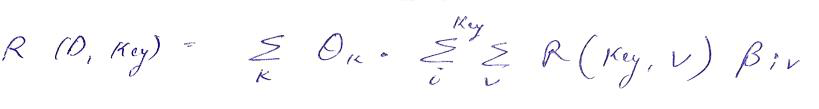

In [ ]:
#  torch.save(model.state_dict(),'Foto_gaussian_t20_if_key_Sco_sig_0_01_div10000_20news_game_hockey_baseball_query_center_.t7')

In [ ]:
# ## Loading a Saved Model
# model = PlsvVAE(num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs, "inverse_quadratic")
# model.to(device)
# all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)
# model.load_state_dict(torch.load('Foto_beta_t50_a100_div500_e20_20news_reuters.t7'))

In [ ]:
def get_topwords(beta, id_vocab):
    topic_indx = 0
    topwords_topic = []

    for i in range(len(beta)):
        topwords_topic.append( str(topic_indx)+": "+ " ".join([id_vocab[j] for j in beta[i].argsort()[:-10 - 1:-1]]))
        topic_indx+=1
    return topwords_topic

In [ ]:
model.eval()
x_list = []
phi_list = []
beta_list = []
labels_list = []
doc_ids = []
zx_phi_list=[]

with torch.no_grad():
    for batch_ndx in all_indices:
        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        relevant_scores = rounded_normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)
        labels_list.extend(labels)
        z, recon_v, zx, zx_phi = model(input_w, relevant_scores, compute_loss=False)
        zx = zx.view(-1, num_coordinate).data.detach().cpu().numpy()
        zx_phi = zx_phi.view(-1, num_topic).data.detach().cpu().numpy()
        zx_phi_list.extend(zx_phi)
        x_list.extend(zx)
        doc_ids.extend(batch_ndx)

    x_list = np.array(x_list)
    # zx_phi_list =  np.array(zx_phi_list)

    beta = model.decoder.weight.data.cpu().numpy().T#
    # beta_bn = model.decoder_bn(model.decoder.weight).cpu().numpy()
    zphi = model.decoder_phi_bn(model.centres).data.cpu().numpy()
    # zphi = model.centres.data.cpu().numpy()
    query_center = model.query_center.data.cpu().numpy()
    print("---"*10)
    topword_topics = get_topwords(beta, id_vocab)
    topword_topics_list=[]
    for topwords in topword_topics:
        topword_topics_list.append(topwords.split())
        print(topwords)
    print("---"*10)

------------------------------
0: game wa team hockey will baseball fan time player ha
1: window application font set error event widget problem int server
2: drive monitor card mac apple ha will color system doe
3: will image graphic program computer system code wa version ha
4: price disk printer software drive program system manual version will
5: wa car ha good will time bike ive problem well
6: file window program will problem running display ha server code
7: wa year team player ha good will hit season well
8: wa god people will ha christian doe armenian jesus word
9: sound ha card work color system problem wa drive will
10: space will wa time system year april cost program launch
11: drive scsi card controller disk ide bus hard system work
12: window card driver problem file system memory will mode work
13: period pt la gm van lost goal team play win
14: window file problem program work help will time system screen
15: will good game list send email ha excellent offer price
16: 

In [ ]:
#@title Previous Contour
def get_Z(X,Y,query_center):
  norms = torch.zeros(X.shape)
  Z = torch.zeros(X.shape)

  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      v = torch.tensor([X[i][j],Y[i][j]])

      norms[i][j] = torch.norm(v)
      Z[i][j]=torch.exp(-0.5 * (torch.pow(norms[i][j],2))/mu_div)
      # Z[i][j]=1.0/(1 + torch.pow(norms[i][j],2)/mu_div)
  return Z

In [ ]:
def get_Z(X,Y,query_center):
  norms = torch.zeros(X.shape)
  Z = torch.zeros(X.shape)

  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      v = torch.tensor([X[i][j],Y[i][j]])

      norms[i][j] = (v-query_center.T).pow(2).sum(-1)
      Z[i][j]=torch.exp(-0.5 * norms[i][j]/mu_div)
      # Z[i][j]=1.0/(1 + norms[i][j]/mu_div)
  return Z

In [ ]:
def get_Contour(ax,x_list,query_center):
  xlist = np.linspace(-100, 100, 500)
  ylist = np.linspace(-100, 100, 500)
  X, Y = np.meshgrid(xlist, ylist)
  Z = get_Z(X,Y,query_center)
  levels = np.arange(0,1,0.1)
  cp = ax.contour(X, Y, Z, levels=levels)
  ax.clabel(cp, inline=1, fontsize=10)

In [ ]:
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show
import seaborn as sb

def plot_fig(zx, labels_list, zphi, query_center):
    labels = []
    for i in range(len(labels_list)):
        labels.append('C'+str(labels_list[i]))
    fig, ax = plt.subplots( figsize=(20, 20))
    get_Contour(ax,zx,query_center)

    sb.scatterplot(ax=ax,x=zx[:,0],y=zx[:,1],hue=labels_list,alpha=1,
                    palette=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']
                   )
    ax.set(ylim=(-50,50))
    ax.set(xlim=(-50,50))
    c=0
    # ax.scatter(zx[:,0], zx[:,1], alpha=0.8, c=labels, facecolors='none', s=8)
    for d in range(len(labels_list)):
      score = rounded_normalized_all_rscores[doc_ids[d]].item()
      if(score>=0.9):
        c =c+1

        # ax.text(zx[d,0],zx[d,1], "HERE" )
        # print(zx[d,0],zx[d,1])
        # print(doc_ids[d])
        # print(score)

    ax.text(query_center[0],query_center[1], 'X' ,c='black')
    ax.text(0,0, 'O' ,c='black')
    ax.scatter(zphi[:, 0], zphi[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=30)
    print(c)
    for indx, topic in enumerate(zphi):
        ax.text(zphi[indx, 0], zphi[indx, 1], 'topic'+str(indx))
    # plt.savefig(loaded_data.__name__+str(a))

In [ ]:
query_center

array([[0.],
       [0.]], dtype=float32)

1406


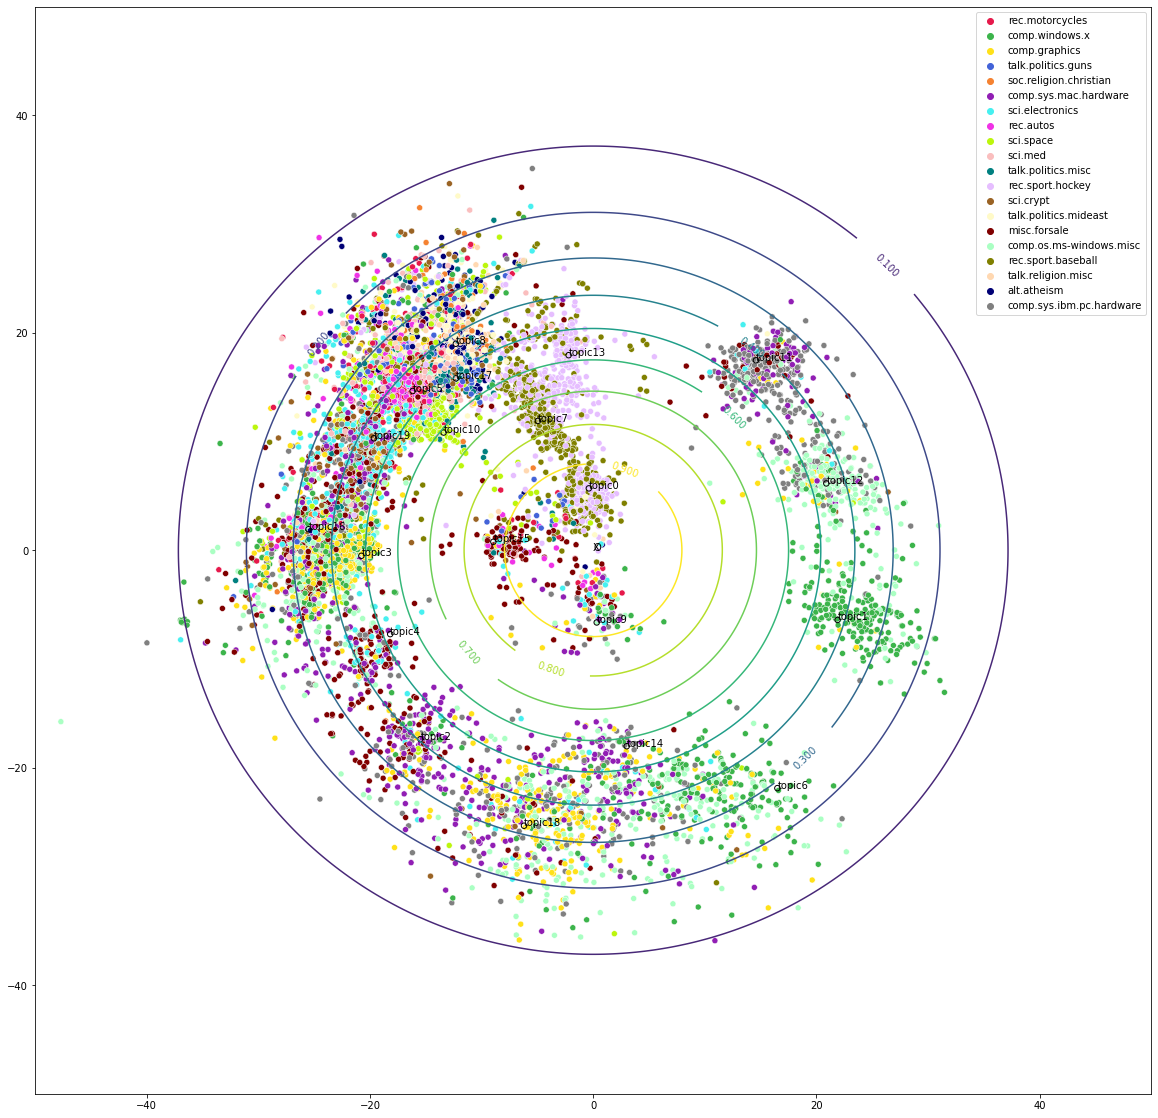

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center)

In [ ]:
# v = torch.tensor(v)
# nor = torch.norm(v)
# Zscore=torch.exp(-0.5 * (torch.pow(nor,2))/mu_div)
# print(Zscore)




#WordCloud



In [ ]:
!pip install wordcloud

In [ ]:
word_list=data_20news_preprocessed[j].split()
print(word_list)
flatten_all_words

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

comment_words = ''
topic_topword_comment = ''

for val in top_10_docs:
    comment_words += " ".join(val)+" "

for topword_topic in topword_topics_list:
    topic_topword_comment += " ".join(topword_topic)+" "

wordcloud_top10_docs = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

wordcloud_topword_topics = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(topic_topword_comment)

f = plt.figure(1,figsize = (8, 8))
plt.title('Words in Top Relevant 10 Docs')
plt.axis("off")
plt.tight_layout(pad = 3.0)
plt.imshow(wordcloud_top10_docs)
g = plt.figure(2,figsize = (8, 8))
plt.title("Top Words in k topics")
plt.axis("off")
plt.tight_layout(pad = 3.0)
plt.imshow(wordcloud_topword_topics)
plt.show()

#Archive

In [ ]:
import plotly.graph_objects as go
epochs=1000
def plot_loss(y,name):
  figure = go.Figure()
  figure.add_trace(go.Scatter(x=[i for i in range(1,epochs+1)], y=y,mode='lines',name=name))
  figure.show(renderer='colab')

plot_loss(x_arr,'KLD')
plot_loss(recon_arr,'Recon_loss')
plot_loss(neg_log_rscore_arr,'RScore')

In [ ]:
plt.hist(x=all_rscores.data)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores

In [ ]:
plt.hist(x=normalized_all_rscores)
# print(normalized_all_rscores)
np.max(normalized_all_rscores.flatten())

In [ ]:
# with open('neg_log_rscore_arr.txt', 'w') as filehandle:
#     for listitem in neg_log_rscore_arr:
#         filehandle.write('%s\n' % listitem)

In [ ]:
all_words_in_docs=[]

def doc_to_words(doc):
  word_list=[]
  for i in doc:
    words = i.split()
    word_list.append([w for w in words])
  return word_list

all_words_in_docs = doc_to_words(data_WoS_preprocessed)

In [ ]:
# data_20news_embedded = []
# for word in all_words_in_docs:
#   for w in word:
#     try:
#       type(word2vec_model[w])=='numpy.ndarray'
#     except KeyError:
#       word.remove(w)
#   data_20news_embedded.append(' '.join(word))
# # data_20news_embedded

In [ ]:
def flatten_list(user_list):
  return [item for sublist in user_list for item in sublist]
flatten_all_words = flatten_list(all_words_in_docs)
# # flatten_embedded = flatten_list(data_20news_embedded)
# # flatten_embedded

In [ ]:
# len(set(flatten_all_words))

In [ ]:
count=0
embeddings = {}

for f in flatten_all_words:
  try :
     embeddings[f] = word2vec_model[f]
  except KeyError:
    count = count+1
print( count / len(flatten_all_words)*100)

In [ ]:
save_obj(embeddings,'embeddings_WoS')

> Keyword search in corpus: Returns docs with matching keywords


In [ ]:
matching = [s for s in data_20news_preprocessed if " sport " in s]
matching

In [ ]:
# !wget https://www.dropbox.com/s/yg1zf6hel0zxt3i/data_20news_preprocessed_labels.pkl
# !wget https://www.dropbox.com/s/5drfxhzxz8nsy2l/embeddings_20news.pkl
# !wget https://www.dropbox.com/s/756dcuil3mjdgus/data_20news_preprocessed.pkl

# TFIDF

In [ ]:
def cosine_similarity_desm_docs_tfidf(query_list, doc, embeddings):

  sim_list = torch.zeros(len(doc))
  index = 0

  for d in doc:
    doc_bar = torch.zeros(300)
    words = d.split()
    for word in words:
      doc_bar.add_(torch.from_numpy(embeddings[word])/torch.norm(torch.from_numpy(embeddings[word])))
    doc_bar = doc_bar / len(words)
    sum = 0

    for q in query_list:
      sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
    sum = sum/len(query_list)
    sim_list[index]=sum
    index = index + 1

  return sim_list

In [ ]:
tfidfvectorizer = TfidfVectorizer(min_df=5,dtype=np.float32,use_idf=True)
tfIdf = tfidfvectorizer.fit_transform(data_preprocessed)
df_tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=tfidfvectorizer.get_feature_names(), columns=["TF-IDF"])
# df_tfidf = df_tfidf.sort_values('TF-IDF', ascending=False)
df_tfidf

In [ ]:
list(vocab.values())[0]

In [ ]:
df_tfidf[]

In [ ]:
df_doc_term_matrix = pd.DataFrame(tfIdf.toarray().transpose(),index=tfidfvectorizer.get_feature_names())
df_doc_term_matrix_sum = df_doc_term_matrix.sum(axis=0)

In [ ]:
df_doc_term_matrix

In [ ]:
df_doc_term_matrix_sum.sort_values(ascending=True)


# Google Pre-trained Model & Word2Vec | Data preprocessing



In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-10-07 04:19:09--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.29.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.29.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.1MB/s    in 1m 40s  

2020-10-07 04:20:49 (15.8 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
start=time()
!gunzip GoogleNews-vectors-negative300.bin.gz
print('Cell took %.2f seconds to run.' % (time() - start))

Cell took 31.12 seconds to run.


In [ ]:
from gensim import models
word2vec_model = models.KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin', binary=True)
# print('Cell took %.2f seconds to run.' % (time() - start))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# data_WoS_read = open("C:/Users/sanuj/Documents/FoTo/data/20News", "r")
# targets_WoS_read = open("C:/Users/sanuj/Documents/FoTo/data/WebOfScience/WOS46985/YL1.txt", "r")
# data_WoS = data_WoS_read.readlines()
# targets_WoS = targets_WoS_read.readlines()

In [ ]:
# data_WoS = [d.strip() for d in data_WoS]
# targets_WoS = [int(d.strip()) for d in targets_WoS]

In [ ]:
# labels_dict ={
#     0 : "Computer Science",
#     1 : "Electrical Engineering",
#     2 : "Psychology",
#     3 : "Mechanical Engineering",
#     4 : "Civil Engineering",
#     5 : "Medical Science",
#     6 : "Biochemistry"}

In [ ]:
# targets_WoS_labels = [labels_dict[t] for t in targets_WoS]

In [ ]:
# data_WoS_preprocessed = []
# data_WoS_labels = []

# for i in range(len(data_WoS)):
#   doc = preprocessing_nonstem(data_WoS[i],word2vec_model)
#   if(doc!=''):
#     data_WoS_preprocessed.append(doc)
#     data_WoS_labels.append(targets_WoS_labels[i])

In [ ]:
# save_obj(data_WoS_preprocessed,'data_WoS_preprocessed')
# save_obj(data_WoS_labels,'data_WoS_labels')